<a href="https://colab.research.google.com/github/jeremybboy/Quantum/blob/main/QuantumML_1_Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### QUANTUM NEURAL NETWORK WITH QISKIT

In [ ]:
!pip install qiskit

In [11]:
import qiskit
from qiskit.visualization import plot_histogram


In [32]:
from qiskit import QuantumCircuit, transpile
#from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [13]:
from qiskit.circuit import QuantumCircuit, ParameterVector
theta = ParameterVector('θ', length=2)

qc = QuantumCircuit(2)
qc.ry(theta[0], 0)#adds a Rotation-Y gate with paramter value Theta.
qc.cry(theta[1], 0, 1)# adds a Controlled Rotation-Y gate. The value of controlled Qubit-1 depends on Qubit 0
qc.draw()

┌──────────┐            
q_0: ┤ Ry(θ[0]) ├─────■──────
     └──────────┘┌────┴─────┐
q_1: ────────────┤ Ry(θ[1]) ├
                 └──────────┘

In [14]:
from qiskit.circuit.library import ZZFeatureMap
qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)
qc_zz.decompose().draw()

┌───┐ ░ ┌─────────────┐                                               »
q_0: ┤ H ├─░─┤ P(2.0*x[0]) ├──■────────────────────────────────────■────■──»
     ├───┤ ░ ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
q_1: ┤ H ├─░─┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
     ├───┤ ░ ├─────────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├─░─┤ P(2.0*x[2]) ├──────────────────────────────────────────┤ X ├»
     └───┘ ░ └─────────────┘                                          └───┘»
«                                               »
«q_0: ──────────────────────────────────■───────»
«                                       │       »
«q_1: ──────────────────────────────────┼────■──»
«     ┌──────────────────────────────┐┌─┴─┐┌─┴─┐»
«q_2: ┤ P(2.0*(π - x[0])*(π - x[2])) ├┤ X ├┤ X ├»
«     └──────────────────────────────┘└───┘└───┘»
«                                          
«q_0: ─────────────────────────────────────
«                                          
«q_1: ──────────────────────────────────■──
«     ┌──────────────────────────────┐┌─┴─┐
«q_2: ┤ P(2.0*(π - x[1])*(π - x[2])) ├┤ X ├
«     └──────────────────────────────┘└───┘

In [15]:
!pip install qiskit-algorithms


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 5.8 MB/s eta 0:00:00


In [16]:
!pip install pylatexenc
!pip install qiskit-machine-learning==0.7.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=a18501c92a3298ef1316023201b660e52e5e983fbde6dbf4ec8c33cbb257630d
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 6.8 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512547 sha256=e49bb6dddf51beb5ea2dbbe4e8c8c8db77e1e295eb1684eba104851fc82e45b2
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [17]:
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 42# The random seed from Classical ML

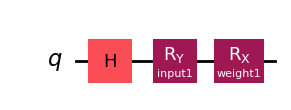

In [18]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

params1 = [Parameter("input1"), Parameter("weight1")]
qc = QuantumCircuit(1)
qc.h(0)
qc.ry(params1[0], 0)
qc.rx(params1[1], 0)
qc.draw("mpl")

In [19]:
#Creating an observable

from qiskit.quantum_info import SparsePauliOp

observable1 = SparsePauliOp.from_list([("Y" * qc.num_qubits, 1)])# If nothing is passecd It uses a "Z" Observable

In [20]:
from qiskit_machine_learning.neural_networks import EstimatorQNN

estimator_qnn = EstimatorQNN(
    circuit=qc, observables=observable1, input_params=[params1[0]], weight_params=[params1[1]]
)
estimator_qnn

input parameters: ['input[0]', 'input[1]']
weight parameters: ['weight[0]', 'weight[1]', 'weight[2]', 'weight[3]']


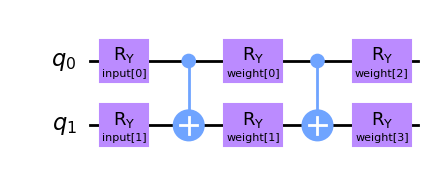

In [21]:
from qiskit.circuit import ParameterVector

inputs2 = ParameterVector("input", 2)
weights2 = ParameterVector("weight", 4)
print(f"input parameters: {[str(item) for item in inputs2.params]}")
print(f"weight parameters: {[str(item) for item in weights2.params]}")

qc2 = QuantumCircuit(2)
qc2.ry(inputs2[0], 0)
qc2.ry(inputs2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[0], 0)
qc2.ry(weights2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[2], 0)
qc2.ry(weights2[3], 1)

qc2.draw("mpl", style="clifford")

In [22]:
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.circuit import ParameterVector

sampler_qnn = SamplerQNN(circuit=qc2, input_params=inputs2, weight_params=weights2)
sampler_qnn

In [23]:
sampler_qnn_ip = algorithm_globals.random.random(sampler_qnn.num_inputs)
sampler_qnn_wts = algorithm_globals.random.random(sampler_qnn.num_weights)
print(f"Number of input features for SamplerQNN: {sampler_qnn.num_inputs} \n Input: {sampler_qnn_ip}")
print(f"Number of trainable weights for SamplerQNN: {sampler_qnn.num_weights} \n Weights: {sampler_qnn_wts}")

Number of input features for SamplerQNN: 2 
 Input: [0.77395605 0.43887844]
Number of trainable weights for SamplerQNN: 4 
 Weights: [0.85859792 0.69736803 0.09417735 0.97562235]


In [24]:
sampler_qnn_forward = sampler_qnn.forward(sampler_qnn_ip, sampler_qnn_wts)

print(f"Forward pass result for SamplerQNN: {sampler_qnn_forward}.  \nShape: {sampler_qnn_forward.shape}")

Forward pass result for SamplerQNN: [[0.23851185 0.1411135  0.3367757  0.28359895]].  
Shape: (1, 4)


In [25]:
sampler_qnn.input_gradients = True
sampler_qnn_ip_grad, sampler_qnn_weight_grad = sampler_qnn.backward(sampler_qnn_ip, sampler_qnn_wts)

print(f"Input gradients for SamplerQNN: {sampler_qnn_ip_grad}.  \nShape: {sampler_qnn_ip_grad}")
print(f"Weight gradients for SamplerQNN: {sampler_qnn_weight_grad}.  \nShape: {sampler_qnn_weight_grad.shape}")

Input gradients for SamplerQNN: [[[ 0.00854017 -0.4260793 ]
  [ 0.29208826  0.08375938]
  [-0.35915753  0.17972714]
  [ 0.05852911  0.16259278]]].  
Shape: [[[ 0.00854017 -0.4260793 ]
  [ 0.29208826  0.08375938]
  [-0.35915753  0.17972714]
  [ 0.05852911  0.16259278]]]
Weight gradients for SamplerQNN: [[[ 0.00609879 -0.30661818 -0.1834591  -0.28341665]
  [-0.02969169  0.17866236  0.1834591  -0.20004909]
  [-0.37812738  0.30266095 -0.30904568  0.28341665]
  [ 0.40172028 -0.17470512  0.30904568  0.20004909]]].  
Shape: (1, 4, 4)


regression

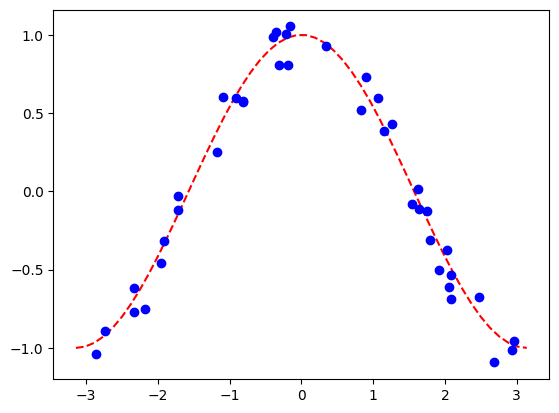

In [26]:
import numpy as np
import matplotlib.pyplot as plt


num_samples = 40
eps = 0.2
lb, ub = -np.pi, np.pi
X_ = np.linspace(lb, ub, num=50).reshape(50, 1)
f = lambda x:np.cos(x)

X = (ub - lb) * algorithm_globals.random.random([num_samples, 1]) + lb
y = f(X[:, 0]) + eps * (2 * algorithm_globals.random.random(num_samples) - 1)

plt.plot(X_, f(X_), "r--")
plt.plot(X, y, "bo")
plt.show()

In [27]:
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
#from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit_machine_learning.circuit.library import QNNCircuit

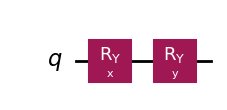

In [28]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)

qc = QNNCircuit(feature_map=feature_map, ansatz=ansatz)

#Here we can use our built-in Feature maps and Ansatz as well however given that this is a simple problem we can use these custom made ones as well. Also this gives us a idea that they are really not some difficult terms and how they look like at the small scale
regression_estimator_qnn = EstimatorQNN(circuit=qc)
# construct the regressor from the Quantum neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=50),
    callback=callback_graph,
)

qc.draw("mpl")

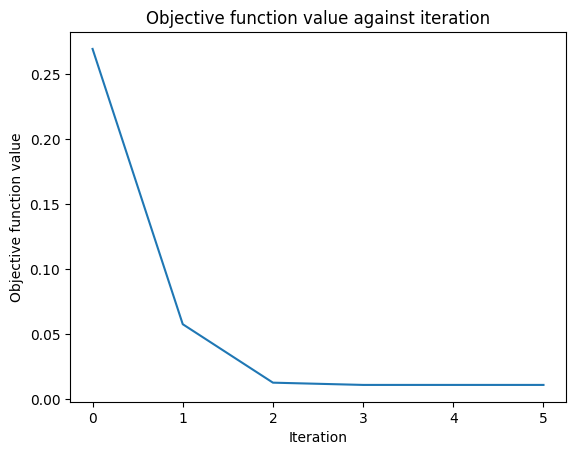

0.9756227572998851

In [29]:
objective_func_vals = []
regressor.fit(X, y)
regressor.score(X, y)

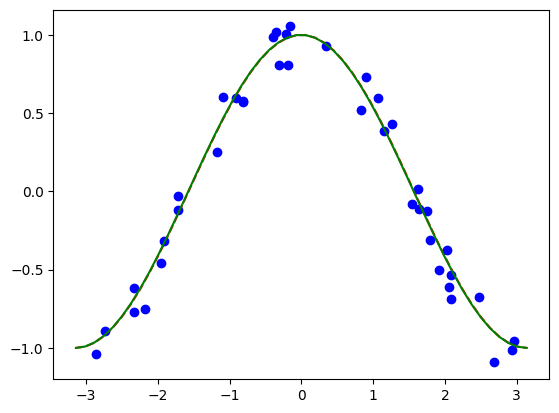

In [30]:
plt.plot(X_, f(X_), "r--")
plt.plot(X, y, "bo")
y_ = regressor.predict(X_)
plt.plot(X_, y_, "g-")#plotting fitted line
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 21.5085
Epoch 2/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.6041
Epoch 3/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.5351
Epoch 4/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.2571
Epoch 5/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 22.8790
Epoch 6/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.2282
Epoch 7/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 20.8904
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


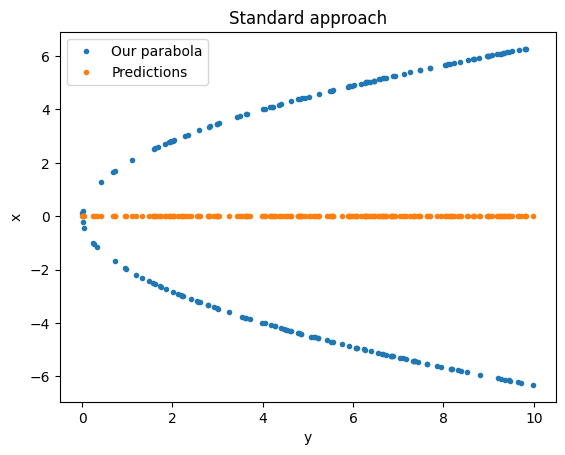

In [31]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

N = 200
# Here our data is a simple parabola that is y**2=4ax
X = np.random.uniform(0, 10, N)
sign = (-1) ** np.random.randint(2, size=N)
Y = np.sqrt(4*X) * sign

act = tf.keras.layers.ReLU()
nn = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation=act, input_shape=(1,)),
  tf.keras.layers.Dense(10, activation=act),
  tf.keras.layers.Dense(1,activation='relu')])


loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
nn.compile(optimizer=optimizer, loss=loss)

results = nn.fit(X, Y, epochs=7, batch_size= 5, verbose=1)
#Plotting( here is where I found this absurd situation)
plt.plot(X,Y,'.',label='Our parabola')
plt.plot(X,nn.predict(X),'.',label='Predictions')
plt.xlabel('y')
plt.ylabel('x')
plt.title('Standard approach')
plt.legend()
plt.show()